# Old Trials

In [1]:
import pandas as pd
import numpy as np

In [2]:
test_data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
train_data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')

In [3]:
train_data.shape

(13636, 15)

In [4]:
train_data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [5]:
counts = {value: np.sum(train_data['Rating'] == value) for value in np.unique(train_data['Rating'])}
print(counts)

{0: 1272, 1: 210, 2: 174, 3: 368, 4: 1241, 5: 10371}


In [6]:
columns_to_drop = ['ID', 'RecipeNumber', 'CommentID', 'UserID', 'CreationTimestamp','RecipeCode','UserName','RecipeName'] #, 'BestScore'
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

In [7]:
train_data.isnull().sum()

UserReputation     0
ReplyCount         0
ThumbsUpCount      0
ThumbsDownCount    0
Rating             0
BestScore          0
Recipe_Review      2
dtype: int64

In [8]:
test_data.isnull().sum()

UserReputation     0
ReplyCount         0
ThumbsUpCount      0
ThumbsDownCount    0
BestScore          0
Recipe_Review      0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=train_data

In [11]:
y=X.pop('Rating')

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserReputation   13636 non-null  int64 
 1   ReplyCount       13636 non-null  int64 
 2   ThumbsUpCount    13636 non-null  int64 
 3   ThumbsDownCount  13636 non-null  int64 
 4   BestScore        13636 non-null  int64 
 5   Recipe_Review    13634 non-null  object
dtypes: int64(5), object(1)
memory usage: 639.3+ KB


In [13]:
X.describe()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,2.160311,0.014520,1.098269,0.543708,153.127897
std,10.086424,0.137323,4.166487,3.265660,140.986908
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,100.000000
50%,1.000000,0.000000,0.000000,0.000000,100.000000
75%,1.000000,0.000000,0.000000,0.000000,100.000000
max,510.000000,3.000000,80.000000,126.000000,946.000000


In [14]:
X['UserReputation'].value_counts()

UserReputation
1      12708
10       478
20       217
0        118
30        54
50        16
40        12
90         7
80         4
60         4
110        3
510        3
100        3
140        2
70         2
220        1
160        1
130        1
150        1
300        1
Name: count, dtype: int64

In [15]:
X['ReplyCount'].value_counts()

ReplyCount
0    13464
1      151
2       16
3        5
Name: count, dtype: int64

In [16]:
X['ThumbsUpCount'].value_counts()

ThumbsUpCount
0     10582
1      1290
2       478
3       279
4       155
6       117
5       110
7        77
8        58
9        56
12       49
10       44
13       34
11       33
16       29
15       28
18       23
17       20
14       19
21       17
20       12
19       11
24       11
23        9
22        9
25        8
31        6
33        6
27        6
26        5
35        4
36        4
42        4
39        3
28        3
45        3
29        3
30        2
76        2
47        2
43        2
37        2
32        2
57        2
44        2
40        2
55        2
41        2
73        1
80        1
69        1
79        1
46        1
50        1
68        1
34        1
48        1
Name: count, dtype: int64

In [17]:
X['ThumbsDownCount'].value_counts()

ThumbsDownCount
0      11816
1        912
2        292
3        143
5         80
4         78
6         52
7         36
9         25
10        24
8         23
13        19
11        17
15        15
12        14
14        12
21        10
16         8
17         6
19         4
18         3
39         3
20         3
31         3
26         3
32         2
46         2
24         2
25         2
22         2
37         2
65         2
23         2
30         2
61         1
27         1
87         1
70         1
42         1
104        1
62         1
63         1
126        1
40         1
29         1
78         1
49         1
71         1
41         1
55         1
38         1
Name: count, dtype: int64

In [18]:
X['BestScore'].value_counts()

BestScore
100    10506
193     1074
253      292
142      147
297      124
       ...  
908        1
529        1
119        1
226        1
754        1
Name: count, Length: 525, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

# Convert object columns to numerical using label encoding
label_encoder = LabelEncoder()
X_encoded = X.copy()  # Create a copy of X to avoid modifying the original DataFrame

# Iterate over each column in X
for column in X_encoded.columns:
    if X_encoded[column].dtype == 'object':
        X_encoded[column] = label_encoder.fit_transform(X_encoded[column])

# Print the encoded DataFrame
X_encoded.describe()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
count,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,2.160311,0.014520,1.098269,0.543708,153.127897,6676.584042
std,10.086424,0.137323,4.166487,3.265660,140.986908,3871.826727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,100.000000,3316.750000
50%,1.000000,0.000000,0.000000,0.000000,100.000000,6673.500000
75%,1.000000,0.000000,0.000000,0.000000,100.000000,10030.250000
max,510.000000,3.000000,80.000000,126.000000,946.000000,13370.000000


In [20]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   UserReputation   13636 non-null  int64
 1   ReplyCount       13636 non-null  int64
 2   ThumbsUpCount    13636 non-null  int64
 3   ThumbsDownCount  13636 non-null  int64
 4   BestScore        13636 non-null  int64
 5   Recipe_Review    13636 non-null  int64
dtypes: int64(6)
memory usage: 639.3 KB


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_columns = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount','BestScore']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

X_encoded_scaled = X_encoded

# Fit and transform the selected columns
X_encoded_scaled[numerical_columns] = scaler.fit_transform(X_encoded[numerical_columns])

# Print the scaled DataFrame
X_encoded_scaled.describe()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
count,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,0.004236,0.004840,0.013728,0.004315,0.161869,6676.584042
std,0.019777,0.045774,0.052081,0.025918,0.149035,3871.826727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001961,0.000000,0.000000,0.000000,0.105708,3316.750000
50%,0.001961,0.000000,0.000000,0.000000,0.105708,6673.500000
75%,0.001961,0.000000,0.000000,0.000000,0.105708,10030.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,13370.000000


**Split train_data into train and validation set**

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_encoded_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets to verify the split
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Validation set shape (X, y):", X_val.shape, y_val.shape)

Training set shape (X, y): (10908, 6) (10908,)
Validation set shape (X, y): (2728, 6) (2728,)


**Model Creation**

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
baseline_model = LinearRegression()

# Train the model on the training data
baseline_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = baseline_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Baseline Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Baseline Model Evaluation:
Mean Squared Error (MSE): 2.327487261595235
R-squared (R2) Score: 0.031062829935669112


### Logistic Regression

In [24]:
"""from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=2000)

# Perform cross-validation
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error to positive
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())"""

'from sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import cross_val_score\n\n# Initialize the Logistic Regression model\nlog_reg_model = LogisticRegression(max_iter=2000)\n\n# Perform cross-validation\ncv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring=\'neg_mean_squared_error\')\n\n# Convert the negative mean squared error to positive\ncv_scores = -cv_scores\n\n# Print the cross-validation scores\nprint("Cross-validation scores:", cv_scores)\nprint("Mean CV Score:", cv_scores.mean())'

In [25]:
"""import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize lists to store mean scores and number of folds
mean_scores = []
num_folds = list(range(2, 30))

# Iterate over different number of folds
for folds in num_folds:
    # Initialize the Logistic Regression model
    logistic_model = LogisticRegression(max_iter=2000)
    
    # Perform cross-validation
    scores = cross_val_score(logistic_model, X_train, y_train, cv=folds, scoring='neg_mean_squared_error')
    
    # Convert the negative mean squared error to positive
    scores = -scores
    
    # Calculate mean score and append to list
    mean_scores.append(scores.mean())

# Plot the graph
plt.plot(num_folds, mean_scores, marker='o')
plt.title('Cross-Validation Score vs. Number of Folds')
plt.xlabel('Number of Folds')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()"""

"import matplotlib.pyplot as plt\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import cross_val_score\n\n# Initialize lists to store mean scores and number of folds\nmean_scores = []\nnum_folds = list(range(2, 30))\n\n# Iterate over different number of folds\nfor folds in num_folds:\n    # Initialize the Logistic Regression model\n    logistic_model = LogisticRegression(max_iter=2000)\n    \n    # Perform cross-validation\n    scores = cross_val_score(logistic_model, X_train, y_train, cv=folds, scoring='neg_mean_squared_error')\n    \n    # Convert the negative mean squared error to positive\n    scores = -scores\n    \n    # Calculate mean score and append to list\n    mean_scores.append(scores.mean())\n\n# Plot the graph\nplt.plot(num_folds, mean_scores, marker='o')\nplt.title('Cross-Validation Score vs. Number of Folds')\nplt.xlabel('Number of Folds')\nplt.ylabel('Mean Squared Error')\nplt.grid(True)\nplt.show()"

In [26]:
"""from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=2000)

# Perform cross-validation
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert the negative mean squared error to positive
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())"""

'from sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import cross_val_score\n\n# Initialize the Logistic Regression model\nlog_reg_model = LogisticRegression(max_iter=2000)\n\n# Perform cross-validation\ncv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=10, scoring=\'neg_mean_squared_error\')\n\n# Convert the negative mean squared error to positive\ncv_scores = -cv_scores\n\n# Print the cross-validation scores\nprint("Cross-validation scores:", cv_scores)\nprint("Mean CV Score:", cv_scores.mean())'

In [27]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'penalty': ['l1','l2'],  
    'solver': ['liblinear'],  # Choose compatible solvers
    'max_iter': [150,175,200,225,250,300],  # Reduce maximum iterations
    'class_weight': [None, 'balanced']
}

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Initialize GridSearchCV with n-fold cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=10, scoring='neg_mean_squared_error')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error on Validation Set:", mse)"""

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\n\n# Define the hyperparameters grid\nparam_grid = {\n    \'C\': [0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter\n    \'penalty\': [\'l1\',\'l2\'],  \n    \'solver\': [\'liblinear\'],  # Choose compatible solvers\n    \'max_iter\': [150,175,200,225,250,300],  # Reduce maximum iterations\n    \'class_weight\': [None, \'balanced\']\n}\n\n# Initialize the Logistic Regression model\nlogistic_model = LogisticRegression()\n\n# Initialize GridSearchCV with n-fold cross-validation\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=10, scoring=\'neg_mean_squared_error\')\n\n# Perform grid search to find the best hyperparameters\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters found\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Get the best model\nbest_model = grid_search.best_estimator_\n\n# Evaluate the best model on the validation set

In [28]:
"""from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Initialize the Logistic Regression model with selected hyperparameters
log_reg_model = LogisticRegression(C=1000, penalty='l1', solver='liblinear', max_iter=150, class_weight='balanced')

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = log_reg_model.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')  # You can choose the averaging method based on your requirements

# Print the F1 score
print("F1 Score:", f1)"""

'from sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import f1_score\n\n# Initialize the Logistic Regression model with selected hyperparameters\nlog_reg_model = LogisticRegression(C=1000, penalty=\'l1\', solver=\'liblinear\', max_iter=150, class_weight=\'balanced\')\n\n# Train the model on the training data\nlog_reg_model.fit(X_train, y_train)\n\n# Make predictions on the validation set\ny_pred = log_reg_model.predict(X_val)\n\n# Calculate the F1 score\nf1 = f1_score(y_val, y_pred, average=\'weighted\')  # You can choose the averaging method based on your requirements\n\n# Print the F1 score\nprint("F1 Score:", f1)'

In [29]:
"""from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model with selected hyperparameters
log_reg_model = LogisticRegression(C=1000, penalty='l1', solver='liblinear', max_iter=150, class_weight='balanced')

# Perform cross-validation
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert the negative mean squared error to positive
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())"""

'from sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import cross_val_score\n\n# Initialize the Logistic Regression model with selected hyperparameters\nlog_reg_model = LogisticRegression(C=1000, penalty=\'l1\', solver=\'liblinear\', max_iter=150, class_weight=\'balanced\')\n\n# Perform cross-validation\ncv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=10, scoring=\'neg_mean_squared_error\')\n\n# Convert the negative mean squared error to positive\ncv_scores = -cv_scores\n\n# Print the cross-validation scores\nprint("Cross-validation scores:", cv_scores)\nprint("Mean CV Score:", cv_scores.mean())'

In [30]:
"""from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with selected hyperparameters
log_reg_model = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter=200)

# Train the model on the training data
log_reg_model.fit(X_train, y_train)"""

"from sklearn.linear_model import LogisticRegression\n\n# Initialize the Logistic Regression model with selected hyperparameters\nlog_reg_model = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter=200)\n\n# Train the model on the training data\nlog_reg_model.fit(X_train, y_train)"

**Converting object data type to numeric data type - Lable Encoding**

In [31]:
from sklearn.preprocessing import LabelEncoder

# Convert object columns to numerical using label encoding
label_encoder = LabelEncoder()
X_test_encoded = test_data.copy()  # Create a copy of X to avoid modifying the original DataFrame

# Iterate over each column in X
for column in X_test_encoded.columns:
    if X_test_encoded[column].dtype == 'object':
        X_test_encoded[column] = label_encoder.fit_transform(X_test_encoded[column])

# Print the encoded DataFrame
X_test_encoded.describe()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000
mean,2.157501,0.014958,1.062253,0.566212,153.264848,2254.262209
std,9.797366,0.139922,4.303231,4.021903,141.355650,1303.040601
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,100.000000,1125.250000
50%,1.000000,0.000000,0.000000,0.000000,100.000000,2256.500000
75%,1.000000,0.000000,0.000000,0.000000,100.000000,3383.750000
max,520.000000,3.000000,106.000000,122.000000,931.000000,4509.000000


In [32]:
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   UserReputation   4546 non-null   int64
 1   ReplyCount       4546 non-null   int64
 2   ThumbsUpCount    4546 non-null   int64
 3   ThumbsDownCount  4546 non-null   int64
 4   BestScore        4546 non-null   int64
 5   Recipe_Review    4546 non-null   int64
dtypes: int64(6)
memory usage: 213.2 KB


**Scaling data - MinMaxScalar**

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_columns = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount','BestScore']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

X_test_encoded_scaled = X_test_encoded

# Fit and transform the selected columns
X_test_encoded_scaled[numerical_columns] = scaler.fit_transform(X_test_encoded[numerical_columns])

# Print the scaled DataFrame
X_test_encoded_scaled.describe()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000
mean,0.004149,0.004986,0.010021,0.004641,0.153716,2254.262209
std,0.018841,0.046641,0.040597,0.032966,0.153815,1303.040601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001923,0.000000,0.000000,0.000000,0.095756,1125.250000
50%,0.001923,0.000000,0.000000,0.000000,0.095756,2256.500000
75%,0.001923,0.000000,0.000000,0.000000,0.095756,3383.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4509.000000


In [34]:
"""y_test_pred = log_reg_model.predict(X_test_encoded_scaled)"""

"""print(np.unique(y_test_pred))"""

"""counts = {value: np.sum(y_test_pred == value) for value in np.unique(y_test_pred)}
print(counts)"""

'counts = {value: np.sum(y_test_pred == value) for value in np.unique(y_test_pred)}\nprint(counts)'

In [35]:
# Create a DataFrame for submissions
#submissions_df = pd.DataFrame(columns=['ID','Rating'])

#submissions_df['ID'] = X_test_encoded['ID']
#submissions_df['Rating'] = y_test_pred

# Save the DataFrame to a CSV file
#submissions_df.to_csv('submission.csv', index=False)

#print(X_test_encoded)

#duplicates = submissions_df[submissions_df.duplicated(subset=['ID'], keep=False)]
#print(duplicates)

#value_counts = submissions_df['ID'].value_counts()

# Filter out values that appear more than once (i.e., duplicates)
#duplicates = value_counts[value_counts > 1]
#print(duplicates)

#submissions_df = submissions_df.drop_duplicates(subset=['ID'])

# Create a DataFrame for submissions
#submissions_df = pd.DataFrame(columns=['ID','Rating'])

#submissions_df['ID'] = range(1,4547)
#submissions_df['Rating'] = y_test_pred

# Save the DataFrame to a CSV file
#submissions_df.to_csv('submission.csv', index=False)

In [36]:
"""submission = pd.DataFrame({
    "ID": range(1,4547),
    "Rating":y_test_pred
})
submission.to_csv('submission.csv',index=False)"""

'submission = pd.DataFrame({\n    "ID": range(1,4547),\n    "Rating":y_test_pred\n})\nsubmission.to_csv(\'submission.csv\',index=False)'

### KNN

In [37]:
"""from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = knn_model.predict(X_val)

# Calculate the accuracy and F1 score
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)"""

'from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score, f1_score\n\n# Initialize the KNN model\nknn_model = KNeighborsClassifier()\n\n# Train the model on the training data\nknn_model.fit(X_train, y_train)\n\n# Make predictions on the validation set\ny_pred = knn_model.predict(X_val)\n\n# Calculate the accuracy and F1 score\naccuracy = accuracy_score(y_val, y_pred)\nf1 = f1_score(y_val, y_pred, average=\'weighted\')\n\n# Print the evaluation metrics\nprint("Accuracy:", accuracy)\nprint("F1 Score:", f1)'

In [38]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [5,8,10,12,15,17,20],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    #'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine', 'hamming']
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV with n-fold cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='f1_micro')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_knn_model.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='micro')

print("F1 Score:", f1)"""

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.neighbors import KNeighborsClassifier\n\n# Define the hyperparameters grid\nparam_grid = {\n    \'n_neighbors\': [5,8,10,12,15,17,20],  # Number of neighbors\n    \'weights\': [\'uniform\', \'distance\'],  # Weight function used in prediction\n    \'algorithm\': [\'auto\', \'ball_tree\', \'kd_tree\', \'brute\'],  # Algorithm used to compute the nearest neighbors\n    #\'metric\': [\'euclidean\', \'manhattan\', \'chebyshev\', \'minkowski\', \'cosine\', \'hamming\']\n}\n\n# Initialize the KNN model\nknn_model = KNeighborsClassifier()\n\n# Initialize GridSearchCV with n-fold cross-validation\ngrid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring=\'f1_micro\')\n\n# Perform grid search to find the best hyperparameters\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters found\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Get the best model\nbest_knn_model = grid_search.best_estimator

In [39]:
"""from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier with best hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=12, weights='distance', algorithm='auto')

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = knn_model.predict(X_val)

# Evaluate the model
f1 = f1_score(y_val, y_pred, average='weighted')  # Calculate F1 score
print("F1 Score:", f1)"""

'from sklearn.neighbors import KNeighborsClassifier\n\n# Initialize KNN classifier with best hyperparameters\nknn_model = KNeighborsClassifier(n_neighbors=12, weights=\'distance\', algorithm=\'auto\')\n\n# Train the model on the training data\nknn_model.fit(X_train, y_train)\n\n# Make predictions on the validation set\ny_pred = knn_model.predict(X_val)\n\n# Evaluate the model\nf1 = f1_score(y_val, y_pred, average=\'weighted\')  # Calculate F1 score\nprint("F1 Score:", f1)'

In [40]:
"""y_test_pred_knn = knn_model.predict(X_test_encoded_scaled)"""

'y_test_pred_knn = knn_model.predict(X_test_encoded_scaled)'

In [41]:
"""print(np.unique(y_test_pred_knn))"""

'print(np.unique(y_test_pred_knn))'

In [42]:
"""counts = {value: np.sum(y_test_pred_knn == value) for value in np.unique(y_test_pred_knn)}
print(counts)"""

'counts = {value: np.sum(y_test_pred_knn == value) for value in np.unique(y_test_pred_knn)}\nprint(counts)'

In [43]:
"""submission = pd.DataFrame({
    "ID": range(1,4547),
    "Rating":y_test_pred_knn
})
submission.to_csv('submission.csv',index=False)"""

'submission = pd.DataFrame({\n    "ID": range(1,4547),\n    "Rating":y_test_pred_knn\n})\nsubmission.to_csv(\'submission.csv\',index=False)'

### SVM

In [44]:
"""from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Initialize the SVM model
svm_model = SVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = svm_model.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')  # You can choose the averaging method based on your requirements

# Print the F1 score
print("F1 Score:", f1)"""

'from sklearn.svm import SVC\nfrom sklearn.metrics import f1_score\n\n# Initialize the SVM model\nsvm_model = SVC()\n\n# Train the model on the training data\nsvm_model.fit(X_train, y_train)\n\n# Make predictions on the validation set\ny_pred = svm_model.predict(X_val)\n\n# Calculate the F1 score\nf1 = f1_score(y_val, y_pred, average=\'weighted\')  # You can choose the averaging method based on your requirements\n\n# Print the F1 score\nprint("F1 Score:", f1)'

In [45]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

# Initialize the SVM model
svm_model = SVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1_weighted')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_svm_model.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the F1 score
print("F1 Score:", f1)"""

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\n\n# Define the hyperparameters grid\nparam_grid = {\n    \'C\': [0.1, 1, 10],  # Regularization parameter\n    \'kernel\': [\'linear\', \'rbf\'],  # Kernel type\n    \'gamma\': [\'scale\', \'auto\']  # Kernel coefficient for \'rbf\' kernel\n}\n\n# Initialize the SVM model\nsvm_model = SVC()\n\n# Initialize GridSearchCV with 5-fold cross-validation\ngrid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring=\'f1_weighted\')\n\n# Perform grid search to find the best hyperparameters\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters found\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Get the best model\nbest_svm_model = grid_search.best_estimator_\n\n# Evaluate the best model on the validation set\ny_pred = best_svm_model.predict(X_val)\n\n# Calculate the F1 score\nf1 = f1_score(y_val, y_pred, average=\'weighted\')\n\n# Print the F1 score\nprint("F1 Score:", f1)'

### Decision Tree

In [46]:
"""from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = dt_classifier.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')  # You can choose the averaging method based on your requirements

# Print the F1 score
print("F1 Score:", f1)"""

'from sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import f1_score\n\n# Initialize the Decision Tree model\ndt_classifier = DecisionTreeClassifier()\n\n# Train the model on the training data\ndt_classifier.fit(X_train, y_train)\n\n# Make predictions on the validation set\ny_pred = dt_classifier.predict(X_val)\n\n# Calculate the F1 score\nf1 = f1_score(y_val, y_pred, average=\'weighted\')  # You can choose the averaging method based on your requirements\n\n# Print the F1 score\nprint("F1 Score:", f1)'

In [47]:
"""from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],  # New parameter 'splitter'
    'max_depth': [10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50],  # Adjusted values for 'min_samples_split'
    'min_samples_leaf': [1, 5, 10, 15, 20],  # Adjusted values for 'min_samples_leaf'
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20, 30, 40],  # New parameter 'max_leaf_nodes'
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],  # New parameter 'min_impurity_decrease'
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3]  # New parameter 'ccp_alpha'
}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,  # Use all available CPU cores
                           scoring='f1_weighted')  # You can choose other scoring metrics

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_dt_model.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the F1 score
print("F1 Score:", f1)"""

'from sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'criterion\': [\'gini\', \'entropy\'],\n    \'splitter\': [\'best\', \'random\'],  # New parameter \'splitter\'\n    \'max_depth\': [10, 15, 20, 25, 30, None],\n    \'min_samples_split\': [2, 5, 10, 20, 30, 40, 50],  # Adjusted values for \'min_samples_split\'\n    \'min_samples_leaf\': [1, 5, 10, 15, 20],  # Adjusted values for \'min_samples_leaf\'\n    \'max_features\': [\'sqrt\', \'log2\', None],\n    \'max_leaf_nodes\': [None, 10, 20, 30, 40],  # New parameter \'max_leaf_nodes\'\n    \'min_impurity_decrease\': [0.0, 0.1, 0.2, 0.3],  # New parameter \'min_impurity_decrease\'\n    \'ccp_alpha\': [0.0, 0.1, 0.2, 0.3]  # New parameter \'ccp_alpha\'\n}\n\n# Initialize the Decision Tree Classifier\ndt_classifier = DecisionTreeClassifier()\n\n# Initialize GridSearchCV with 5-fold cross-validation\ngrid_search = GridSearchCV(estimator=dt_cl

In [48]:
"""from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the best hyperparameters
best_hyperparameters = {
    'ccp_alpha': 0.0,
    'criterion': 'entropy',
    'max_depth': 20,
    'max_features': None,
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 10,
    'min_samples_split': 2,
    'splitter': 'best'
}

# Initialize the DecisionTreeClassifier with the best hyperparameters
dt_classifier = DecisionTreeClassifier(**best_hyperparameters)

# Assuming you have your training data X_train and corresponding labels y_train
# Replace X_train and y_train with your actual training data and labels

# Train the DecisionTreeClassifier
dt_classifier.fit(X_train, y_train)


y_pred_dt = dt_classifier.predict(X_test_encoded_scaled)

# Evaluate the model
# Assuming you have your test data X_test and corresponding labels y_test
# Replace X_test and y_test with your actual test data and labels

# Calculate accuracy
# y_pred = dt_classifier.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
"""

'from sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score\n\n# Define the best hyperparameters\nbest_hyperparameters = {\n    \'ccp_alpha\': 0.0,\n    \'criterion\': \'entropy\',\n    \'max_depth\': 20,\n    \'max_features\': None,\n    \'max_leaf_nodes\': None,\n    \'min_impurity_decrease\': 0.0,\n    \'min_samples_leaf\': 10,\n    \'min_samples_split\': 2,\n    \'splitter\': \'best\'\n}\n\n# Initialize the DecisionTreeClassifier with the best hyperparameters\ndt_classifier = DecisionTreeClassifier(**best_hyperparameters)\n\n# Assuming you have your training data X_train and corresponding labels y_train\n# Replace X_train and y_train with your actual training data and labels\n\n# Train the DecisionTreeClassifier\ndt_classifier.fit(X_train, y_train)\n\n\ny_pred_dt = dt_classifier.predict(X_test_encoded_scaled)\n\n# Evaluate the model\n# Assuming you have your test data X_test and corresponding labels 

In [49]:
"""print(np.unique(y_pred_dt))"""

'print(np.unique(y_pred_dt))'

In [50]:
"""counts = {value: np.sum(y_pred_dt == value) for value in np.unique(y_pred_dt)}
print(counts)"""

'counts = {value: np.sum(y_pred_dt == value) for value in np.unique(y_pred_dt)}\nprint(counts)'

In [51]:
"""submission = pd.DataFrame({
    "ID": range(1,4547),
    "Rating":y_pred_dt
})
submission.to_csv('submission.csv',index=False)"""

'submission = pd.DataFrame({\n    "ID": range(1,4547),\n    "Rating":y_pred_dt\n})\nsubmission.to_csv(\'submission.csv\',index=False)'

### Bagging Algorithm - Random Forest

In [52]:
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the F1 score
print("F1 Score:", f1)"""

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import f1_score\n\n# Initialize the Random Forest Classifier\nrf_classifier = RandomForestClassifier()\n\n# Train the model on the training data\nrf_classifier.fit(X_train, y_train)\n\n# Make predictions on the validation set\ny_pred = rf_classifier.predict(X_val)\n\n# Calculate the F1 score\nf1 = f1_score(y_val, y_pred, average=\'weighted\')\n\n# Print the F1 score\nprint("F1 Score:", f1)'

In [53]:
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [300, 350, 400, 450, 500],
    'max_depth': [2, 5, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,  # Use all available CPU cores
                           scoring='f1_weighted')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_rf_model.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the F1 score
print("F1 Score:", f1)"""

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'n_estimators\': [300, 350, 400, 450, 500],\n    \'max_depth\': [2, 5, None],\n    \'min_samples_split\': [5, 10, 15],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'sqrt\', \'log2\', None]\n}\n\n# Initialize the Random Forest Classifier\nrf_classifier = RandomForestClassifier()\n\n# Initialize GridSearchCV with 5-fold cross-validation\ngrid_search = GridSearchCV(estimator=rf_classifier,\n                           param_grid=param_grid,\n                           cv=5,\n                           n_jobs=-1,  # Use all available CPU cores\n                           scoring=\'f1_weighted\')\n\n# Fit the grid search to the training data\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters found\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Get the best model\nbest_rf_model = grid_s

In [54]:
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Define the best hyperparameters
best_hyperparameters = {
    'max_depth': None,
    'max_features': None,
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 350
}

# Initialize the RandomForestClassifier with the best hyperparameters
rf_classifier = RandomForestClassifier(**best_hyperparameters)

# Train the RandomForestClassifier
rf_classifier.fit(X_train, y_train)


y_pred_rf = rf_classifier.predict(X_test_encoded_scaled)
"""

"from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import f1_score\nfrom sklearn.model_selection import train_test_split\n\n# Define the best hyperparameters\nbest_hyperparameters = {\n    'max_depth': None,\n    'max_features': None,\n    'min_samples_leaf': 4,\n    'min_samples_split': 10,\n    'n_estimators': 350\n}\n\n# Initialize the RandomForestClassifier with the best hyperparameters\nrf_classifier = RandomForestClassifier(**best_hyperparameters)\n\n# Train the RandomForestClassifier\nrf_classifier.fit(X_train, y_train)\n\n\ny_pred_rf = rf_classifier.predict(X_test_encoded_scaled)\n"

In [55]:
"""print(np.unique(y_pred_rf))"""

'print(np.unique(y_pred_rf))'

In [56]:
"""counts = {value: np.sum(y_pred_rf == value) for value in np.unique(y_pred_rf)}
print(counts)"""

'counts = {value: np.sum(y_pred_rf == value) for value in np.unique(y_pred_rf)}\nprint(counts)'

In [57]:
"""submission = pd.DataFrame({
    "ID": range(1,4547),
    "Rating":y_pred_rf
})
submission.to_csv('submission.csv',index=False)"""

'submission = pd.DataFrame({\n    "ID": range(1,4547),\n    "Rating":y_pred_rf\n})\nsubmission.to_csv(\'submission.csv\',index=False)'

### Boosting Algorithm - AdaBoost

In [58]:
"""from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score

# Initialize the AdaBoost Classifier
ada_classifier = AdaBoostClassifier()

# Train the model on the training data
ada_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = ada_classifier.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the F1 score
print("F1 Score:", f1)"""

'from sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.metrics import f1_score\n\n# Initialize the AdaBoost Classifier\nada_classifier = AdaBoostClassifier()\n\n# Train the model on the training data\nada_classifier.fit(X_train, y_train)\n\n# Make predictions on the validation set\ny_pred = ada_classifier.predict(X_val)\n\n# Calculate the F1 score\nf1 = f1_score(y_val, y_pred, average=\'weighted\')\n\n# Print the F1 score\nprint("F1 Score:", f1)'

In [59]:
"""from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

# Initialize the AdaBoost Classifier
ada_classifier = AdaBoostClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=ada_classifier,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,  # Use all available CPU cores
                           scoring='f1_weighted')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_ada_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_ada_model.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the F1 score
print("F1 Score:", f1)"""

'from sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'n_estimators\': [50, 100, 150, 200],\n    \'learning_rate\': [0.01, 0.1, 0.5, 1.0],\n    \'algorithm\': [\'SAMME\', \'SAMME.R\'],\n}\n\n# Initialize the AdaBoost Classifier\nada_classifier = AdaBoostClassifier()\n\n# Initialize GridSearchCV with 5-fold cross-validation\ngrid_search = GridSearchCV(estimator=ada_classifier,\n                           param_grid=param_grid,\n                           cv=5,\n                           n_jobs=-1,  # Use all available CPU cores\n                           scoring=\'f1_weighted\')\n\n# Fit the grid search to the training data\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters found\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Get the best model\nbest_ada_model = grid_search.best_estimator_\n\n# Evaluate the best model on the validation set\ny_pred = bes

### Multi-Layer Perceptron

In [60]:
"""from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Initialize the MLP Classifier
mlp_classifier = MLPClassifier()

# Train the model on the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = mlp_classifier.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the F1 score
print("F1 Score:", f1)"""

'from sklearn.neural_network import MLPClassifier\nfrom sklearn.metrics import f1_score\n\n# Initialize the MLP Classifier\nmlp_classifier = MLPClassifier()\n\n# Train the model on the training data\nmlp_classifier.fit(X_train, y_train)\n\n# Make predictions on the validation set\ny_pred = mlp_classifier.predict(X_val)\n\n# Calculate the F1 score\nf1 = f1_score(y_val, y_pred, average=\'weighted\')\n\n# Print the F1 score\nprint("F1 Score:", f1)'

In [61]:
"""from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (100, 50), (200, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize the MLP Classifier
mlp_classifier = MLPClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=mlp_classifier,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,  # Use all available CPU cores
                           scoring='f1_weighted')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_mlp_model.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the F1 score
print("F1 Score:", f1)"""

'from sklearn.neural_network import MLPClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'hidden_layer_sizes\': [(100,), (200,), (100, 50), (200, 100)],\n    \'activation\': [\'relu\', \'tanh\', \'logistic\'],\n    \'solver\': [\'adam\', \'sgd\'],\n    \'alpha\': [0.0001, 0.001, 0.01],\n    \'learning_rate\': [\'constant\', \'adaptive\']\n}\n\n# Initialize the MLP Classifier\nmlp_classifier = MLPClassifier()\n\n# Initialize GridSearchCV with 5-fold cross-validation\ngrid_search = GridSearchCV(estimator=mlp_classifier,\n                           param_grid=param_grid,\n                           cv=5,\n                           n_jobs=-1,  # Use all available CPU cores\n                           scoring=\'f1_weighted\')\n\n# Fit the grid search to the training data\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters found\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Get the best model

In [62]:
"""Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer"""

'Import necessary libraries\nimport pandas as pd\nimport numpy as np\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.metrics import f1_score, make_scorer'

In [63]:
"""# Load the data
train_data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
test_data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')"""

"# Load the data\ntrain_data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')\ntest_data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')"

In [64]:
"""# Drop unnecessary columns
columns_to_drop = ['ID', 'RecipeNumber', 'CommentID', 'UserID', 'CreationTimestamp', 'RecipeCode', 'UserName', 'RecipeName']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)"""

"# Drop unnecessary columns\ncolumns_to_drop = ['ID', 'RecipeNumber', 'CommentID', 'UserID', 'CreationTimestamp', 'RecipeCode', 'UserName', 'RecipeName']\ntrain_data = train_data.drop(columns=columns_to_drop)\ntest_data = test_data.drop(columns=columns_to_drop)"

In [65]:
"""# Separate features and target
X_train = train_data.drop('Rating', axis=1)
y_train = train_data['Rating']"""

"# Separate features and target\nX_train = train_data.drop('Rating', axis=1)\ny_train = train_data['Rating']"

In [66]:
"""# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)"""

'# Split the training data into training and validation sets\nX_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)'

In [67]:
"""# Define the preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
text_transformer = TfidfVectorizer()"""

"# Define the preprocessing steps\nnumeric_transformer = StandardScaler()\ncategorical_transformer = OneHotEncoder(handle_unknown='ignore')\ntext_transformer = TfidfVectorizer()"

In [68]:
"""# Define the preprocessing pipeline
numeric_categorical_pipe = Pipeline([
    ('numeric_transformer', numeric_transformer),
    ('categorical_transformer', categorical_transformer)
])"""

"# Define the preprocessing pipeline\nnumeric_categorical_pipe = Pipeline([\n    ('numeric_transformer', numeric_transformer),\n    ('categorical_transformer', categorical_transformer)\n])"

In [69]:
"""# Create the full pipeline
full_pipe = Pipeline([
    ('numeric_categorical_pipe', numeric_categorical_pipe),
    ('text_transformer', text_transformer),
    ('logistic_regression', LogisticRegression(max_iter=2000))
])"""

"# Create the full pipeline\nfull_pipe = Pipeline([\n    ('numeric_categorical_pipe', numeric_categorical_pipe),\n    ('text_transformer', text_transformer),\n    ('logistic_regression', LogisticRegression(max_iter=2000))\n])"

In [70]:
"""# Define the hyperparameter grid
param_grid = {
    'logistic_regression__C': [0.01, 0.1, 1, 10, 100],
    'logistic_regression__penalty': ['l1', 'l2'],
    'logistic_regression__class_weight': [None, 'balanced']
}"""

"# Define the hyperparameter grid\nparam_grid = {\n    'logistic_regression__C': [0.01, 0.1, 1, 10, 100],\n    'logistic_regression__penalty': ['l1', 'l2'],\n    'logistic_regression__class_weight': [None, 'balanced']\n}"

In [71]:
"""# Create a scorer for F1-weighted
f1_weighted_scorer = make_scorer(f1_score, average='weighted')

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(full_pipe, param_grid, cv=5, scoring=f1_weighted_scorer)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_val)
f1 = f1_score(y_val, y_pred, average='weighted')
print("F1 Score on Validation Set:", f1)"""

'# Create a scorer for F1-weighted\nf1_weighted_scorer = make_scorer(f1_score, average=\'weighted\')\n\n# Perform grid search to find the best hyperparameters\ngrid_search = GridSearchCV(full_pipe, param_grid, cv=5, scoring=f1_weighted_scorer)\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters found\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Get the best model\nbest_model = grid_search.best_estimator_\n\n# Evaluate the best model on the validation set\ny_pred = best_model.predict(X_val)\nf1 = f1_score(y_val, y_pred, average=\'weighted\')\nprint("F1 Score on Validation Set:", f1)'

In [72]:
"""# Preprocess the test data
X_test = test_data
X_test = best_model.named_steps['numeric_categorical_pipe'].transform(X_test)
X_test = best_model.named_steps['text_transformer'].transform(X_test)"""

"# Preprocess the test data\nX_test = test_data\nX_test = best_model.named_steps['numeric_categorical_pipe'].transform(X_test)\nX_test = best_model.named_steps['text_transformer'].transform(X_test)"

In [73]:
"""# Make predictions on the test set
y_test_pred = best_model.named_steps['logistic_regression'].predict(X_test)"""

"# Make predictions on the test set\ny_test_pred = best_model.named_steps['logistic_regression'].predict(X_test)"

In [74]:
"""# Create a submission DataFrame
submission = pd.DataFrame({
    "ID": range(1, len(test_data) + 1),
    "Rating": y_test_pred
})"""

'# Create a submission DataFrame\nsubmission = pd.DataFrame({\n    "ID": range(1, len(test_data) + 1),\n    "Rating": y_test_pred\n})'

In [75]:
"""# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)"""

"# Save the submission to a CSV file\nsubmission.to_csv('submission.csv', index=False)"

# **New Approach - Final**

## **Data Preprocessing**

In [76]:
import pandas as pd
import numpy as np

In [77]:
test_data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
train_data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')

In [78]:
train_data.count()

ID                   13636
RecipeNumber         13636
RecipeCode           13636
RecipeName           13636
CommentID            13636
UserID               13636
UserName             13636
UserReputation       13636
CreationTimestamp    13636
ReplyCount           13636
ThumbsUpCount        13636
ThumbsDownCount      13636
Rating               13636
BestScore            13636
Recipe_Review        13634
dtype: int64

Here we can see that in the Recipe_Review column we have 2 entries which are null.

In [79]:
test_data.count()

ID                   4546
RecipeNumber         4546
RecipeCode           4546
RecipeName           4546
CommentID            4546
UserID               4546
UserName             4546
UserReputation       4546
CreationTimestamp    4546
ReplyCount           4546
ThumbsUpCount        4546
ThumbsDownCount      4546
BestScore            4546
Recipe_Review        4546
dtype: int64

Here all the deatures of all entries are not null which means overall it is a good dataset.

In [80]:
# Remove entries where any value is NaN across all columns
train_data = train_data.dropna(how='any')

In [81]:
# Print the shape of the cleaned DataFrame to compare with the original
print("Shape of cleaned DataFrame:", train_data.shape)

Shape of cleaned DataFrame: (13634, 15)


Dropped 2 entries out of 13k+

In [82]:
# Remove entries where any value is NaN across all columns
test_data = test_data.dropna(how='any')

In [83]:
# Print the shape of the cleaned DataFrame to compare with the original
print("Shape of cleaned DataFrame:", test_data.shape)

Shape of cleaned DataFrame: (4546, 14)


In [84]:
# Add a column to indicate whether it's train or test data
#train_data['Data_Type'] = 'Train'
#test_data['Data_Type'] = 'Test'

Adding a new feature in the train_data dataset so that we can combine it with train_data for preprocessing together.

In [85]:
# Add a column to test data to match the structure of train data
test_data['Rating'] = np.nan

In [86]:
# Concatenate train and test data
combined_data = pd.concat([train_data, test_data], ignore_index=True)

In [87]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18180 entries, 0 to 18179
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18180 non-null  int64  
 1   RecipeNumber       18180 non-null  int64  
 2   RecipeCode         18180 non-null  int64  
 3   RecipeName         18180 non-null  object 
 4   CommentID          18180 non-null  object 
 5   UserID             18180 non-null  object 
 6   UserName           18180 non-null  object 
 7   UserReputation     18180 non-null  int64  
 8   CreationTimestamp  18180 non-null  int64  
 9   ReplyCount         18180 non-null  int64  
 10  ThumbsUpCount      18180 non-null  int64  
 11  ThumbsDownCount    18180 non-null  int64  
 12  Rating             13634 non-null  float64
 13  BestScore          18180 non-null  int64  
 14  Recipe_Review      18180 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 2.1+ MB


In [88]:
counts = {value: np.sum(combined_data['Rating'] == value) for value in np.unique(combined_data['Rating'])}
print(counts)

{0.0: 1272, 1.0: 210, 2.0: 174, 3.0: 368, 4.0: 1241, 5.0: 10369, nan: 0}


About 77% of the ratings were 5

In [89]:
combined_data.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')

In [90]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18180 entries, 0 to 18179
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18180 non-null  int64  
 1   RecipeNumber       18180 non-null  int64  
 2   RecipeCode         18180 non-null  int64  
 3   RecipeName         18180 non-null  object 
 4   CommentID          18180 non-null  object 
 5   UserID             18180 non-null  object 
 6   UserName           18180 non-null  object 
 7   UserReputation     18180 non-null  int64  
 8   CreationTimestamp  18180 non-null  int64  
 9   ReplyCount         18180 non-null  int64  
 10  ThumbsUpCount      18180 non-null  int64  
 11  ThumbsDownCount    18180 non-null  int64  
 12  Rating             13634 non-null  float64
 13  BestScore          18180 non-null  int64  
 14  Recipe_Review      18180 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 2.1+ MB


In [91]:
combined_data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5.0,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5.0,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3.0,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5.0,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4.0,100,Great basic recipe. I added 2 teaspoons Tuscan...


### **Finding correlation between features**

In [92]:
temp_df = combined_data[['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName',
                      'UserName', 'UserReputation', 'CreationTimestamp',
                      'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',
                      'BestScore','Rating']]

In [93]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18180 entries, 0 to 18179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18180 non-null  int64  
 1   RecipeNumber       18180 non-null  int64  
 2   RecipeCode         18180 non-null  int64  
 3   RecipeName         18180 non-null  object 
 4   UserName           18180 non-null  object 
 5   UserReputation     18180 non-null  int64  
 6   CreationTimestamp  18180 non-null  int64  
 7   ReplyCount         18180 non-null  int64  
 8   ThumbsUpCount      18180 non-null  int64  
 9   ThumbsDownCount    18180 non-null  int64  
 10  BestScore          18180 non-null  int64  
 11  Rating             13634 non-null  float64
dtypes: float64(1), int64(9), object(2)
memory usage: 1.7+ MB


In [94]:
temp_df.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Rating
0,70,71,12259,Banana Bars with Cream Cheese Frosting,misscoffeepot,20,1622717078,0,0,0,100,5.0
1,72,88,8202,Simple Taco Soup,MichelleMalone,1,1622717852,0,0,1,100,5.0
2,458,3,2832,Cheeseburger Soup,jeannem32,1,1622717357,0,0,0,100,3.0
3,7,50,100276,Grilled Huli Huli Chicken,ds422,1,1622648899,0,0,0,100,5.0
4,60,12,19731,Cauliflower Soup,SusanHoward,1,1622718260,0,0,0,100,4.0


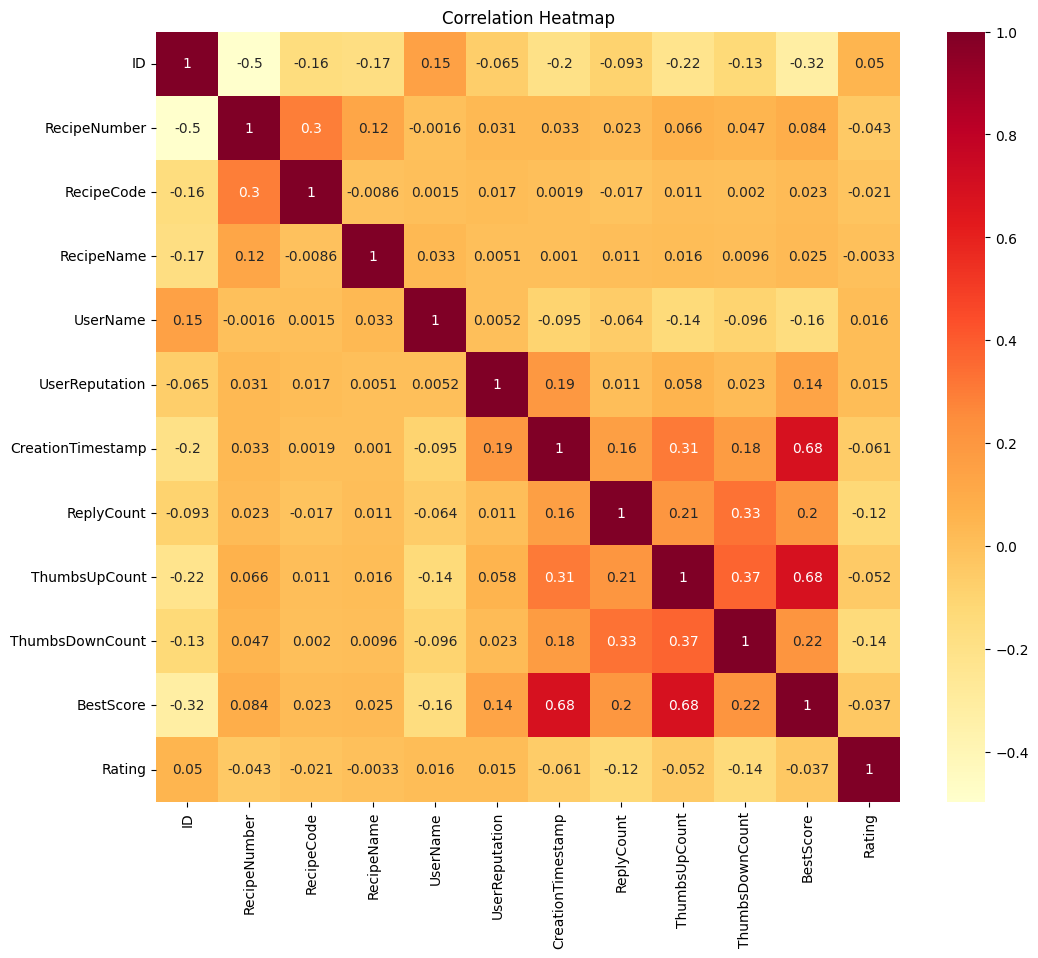

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert object columns to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
temp_df.loc[:, 'RecipeName'] = le.fit_transform(temp_df['RecipeName'])
temp_df.loc[:, 'UserName'] = le.fit_transform(temp_df['UserName'])

# Calculate the correlation matrix
corr_matrix = temp_df.corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

This heatmap gives us visuals, so that we can see if any features are highly correlated. 

Another focus was on the features 'RecipeNumber', 'RecipeCode' and 'RecipeName'. As all the three features point to the same object, I wanted to see if they were correlated. Although in real world they would be highly correlated but in the socpe of this dataset they are not.

### **Drop Columns of lesser relevence**

In [96]:
columns_to_drop = ['ID', 'CommentID', 'UserID','UserName','RecipeName','RecipeNumber', 'CreationTimestamp'] #, 'BestScore', 'RecipieCode','Recipe_Name_New','RecipeName'
combined_data = combined_data.drop(columns=columns_to_drop)

Between the features 'RecipeName', 'RecipeNumber' and 'RecipeCode', the later gave the highest accuracy and since all the three things point to the same object it only made sense to include just one and drop the others.

In [97]:
combined_data.columns

Index(['RecipeCode', 'UserReputation', 'ReplyCount', 'ThumbsUpCount',
       'ThumbsDownCount', 'Rating', 'BestScore', 'Recipe_Review'],
      dtype='object')

In [98]:
X=combined_data

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18180 entries, 0 to 18179
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RecipeCode       18180 non-null  int64  
 1   UserReputation   18180 non-null  int64  
 2   ReplyCount       18180 non-null  int64  
 3   ThumbsUpCount    18180 non-null  int64  
 4   ThumbsDownCount  18180 non-null  int64  
 5   Rating           13634 non-null  float64
 6   BestScore        18180 non-null  int64  
 7   Recipe_Review    18180 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 1.1+ MB


In [100]:
X.describe()

,RecipeCode,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,13634.000000,18180.000000
mean,21774.727283,2.159736,0.014631,1.089384,0.549395,4.288617,153.167987
std,23966.015985,10.015210,0.137981,4.201219,3.470310,1.544928,141.081974
min,386.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6086.000000,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000
50%,14600.000000,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000
75%,33121.000000,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000
max,191775.000000,520.000000,3.000000,106.000000,126.000000,5.000000,946.000000


In [101]:
X['UserReputation'].unique()

array([ 20,   1,  10,  80,  30,   0,  60,  90, 160,  40, 510, 100,  50,
       140,  70, 220, 110, 130, 150, 300, 170, 520])

In [102]:
X['ReplyCount'].value_counts()

ReplyCount
0    17950
1      200
2       24
3        6
Name: count, dtype: int64

### **One Hot Encoding - ReplyCount**

In [103]:
#**One Hot Encoding**

import pandas as pd

# Assuming X is your dataset
# Perform one-hot encoding on ReplyCount
X = pd.get_dummies(X, columns=['ReplyCount'], prefix='ReplyCount')

# Check the modified dataset
print(X.head())

   RecipeCode  UserReputation  ThumbsUpCount  ThumbsDownCount  Rating  \
0       12259              20              0                0     5.0   
1        8202               1              0                1     5.0   
2        2832               1              0                0     3.0   
3      100276               1              0                0     5.0   
4       19731               1              0                0     4.0   

   BestScore                                      Recipe_Review  ReplyCount_0  \
0        100  great recipe! I have made them just as written...          True   
1        100  This is an easy and quick recipe that is great...          True   
2        100  I think I was looking for something extra spec...          True   
3        100  This is our favorite grilled chicken recipe.  ...          True   
4        100  Great basic recipe. I added 2 teaspoons Tuscan...          True   

   ReplyCount_1  ReplyCount_2  ReplyCount_3  
0         False         Fals

In [104]:
X.columns

Index(['RecipeCode', 'UserReputation', 'ThumbsUpCount', 'ThumbsDownCount',
       'Rating', 'BestScore', 'Recipe_Review', 'ReplyCount_0', 'ReplyCount_1',
       'ReplyCount_2', 'ReplyCount_3'],
      dtype='object')

### **Standard Scalar**

In [105]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_columns = ['UserReputation', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']

# Initialize StandardScaler
scaler = StandardScaler()

X_scaled = X.copy()

# Fit and transform the selected columns
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Print the scaled DataFrame
X_scaled.describe()

X = X_scaled

In [106]:
X.describe()

,RecipeCode,UserReputation,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,18180.000000,1.818000e+04,1.818000e+04,1.818000e+04,13634.000000,1.818000e+04
mean,21774.727283,2.970366e-17,6.253401e-17,1.836937e-17,4.288617,3.361203e-17
std,23966.015985,1.000028e+00,1.000028e+00,1.000028e+00,1.544928,1.000028e+00
min,386.000000,-2.156515e-01,-2.593090e-01,-1.583173e-01,0.000000,-1.085696e+00
25%,6086.000000,-1.158007e-01,-2.593090e-01,-1.583173e-01,5.000000,-3.768692e-01
50%,14600.000000,-1.158007e-01,-2.593090e-01,-1.583173e-01,5.000000,-3.768692e-01
75%,33121.000000,-1.158007e-01,-2.593090e-01,-1.583173e-01,5.000000,-3.768692e-01
max,191775.000000,5.170681e+01,2.497216e+01,3.615068e+01,5.000000,5.619809e+00


### **Vectorization**

In [107]:
#**Vectorization**

import pandas as pd
import string

# Function to remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Apply the function to the RecipeReview column
X['Recipe_Review'] = X['Recipe_Review'].apply(remove_punctuation)
test_data['Recipe_Review'] = test_data['Recipe_Review'].apply(remove_punctuation)

print(X)

       RecipeCode  UserReputation  ThumbsUpCount  ThumbsDownCount  Rating  \
0           12259        1.781366      -0.259309        -0.158317     5.0   
1            8202       -0.115801      -0.259309         0.129849     5.0   
2            2832       -0.115801      -0.259309        -0.158317     3.0   
3          100276       -0.115801      -0.259309        -0.158317     5.0   
4           19731       -0.115801      -0.259309        -0.158317     4.0   
...           ...             ...            ...              ...     ...   
18175       17310       -0.115801      -0.259309        -0.158317     NaN   
18176       26937       -0.115801      -0.259309        -0.158317     NaN   
18177       41095       -0.115801      -0.259309        -0.158317     NaN   
18178       19731       -0.115801      -0.259309         0.129849     NaN   
18179       42873       -0.115801      -0.259309        -0.158317     NaN   

       BestScore                                      Recipe_Review  \
0   

In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18180 entries, 0 to 18179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RecipeCode       18180 non-null  int64  
 1   UserReputation   18180 non-null  float64
 2   ThumbsUpCount    18180 non-null  float64
 3   ThumbsDownCount  18180 non-null  float64
 4   Rating           13634 non-null  float64
 5   BestScore        18180 non-null  float64
 6   Recipe_Review    18180 non-null  object 
 7   ReplyCount_0     18180 non-null  bool   
 8   ReplyCount_1     18180 non-null  bool   
 9   ReplyCount_2     18180 non-null  bool   
 10  ReplyCount_3     18180 non-null  bool   
dtypes: bool(4), float64(5), int64(1), object(1)
memory usage: 1.0+ MB


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming df is your DataFrame and 'RecipeReview' is the column you want to vectorize
corpus = X['Recipe_Review'].tolist()

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',           # Ignore common English stop words
    analyzer='word',                # Tokenize by word
    min_df=5,                       # Ignore terms that have a document frequency strictly lower than 5
    max_df=0.7,)

# Fit and transform the 'RecipeReview' column to TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original DataFrame
X = pd.concat([X.drop(columns=['Recipe_Review']), tfidf_df], axis=1)

# Optionally, drop the 'RecipeReview' column if you no longer need it
# df_concatenated.drop(columns=['RecipeReview'], inplace=True)

# Print the updated DataFrame
print(X.head())

   RecipeCode  UserReputation  ThumbsUpCount  ThumbsDownCount  Rating  \
0       12259        1.781366      -0.259309        -0.158317     5.0   
1        8202       -0.115801      -0.259309         0.129849     5.0   
2        2832       -0.115801      -0.259309        -0.158317     3.0   
3      100276       -0.115801      -0.259309        -0.158317     5.0   
4       19731       -0.115801      -0.259309        -0.158317     4.0   

   BestScore  ReplyCount_0  ReplyCount_1  ReplyCount_2  ReplyCount_3  ...  \
0  -0.376869          True         False         False         False  ...   
1  -0.376869          True         False         False         False  ...   
2  -0.376869          True         False         False         False  ...   
3  -0.376869          True         False         False         False  ...   
4  -0.376869          True         False         False         False  ...   

   yummy  zero  zest  zesty  zing  zip  ziplock  zippy  zucchini  zuchinni  
0    0.0   0.0   0.0 

In [110]:
X.describe()

,RecipeCode,UserReputation,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,10,100,1010,1015,...,yummy,zero,zest,zesty,zing,zip,ziplock,zippy,zucchini,zuchinni
count,18180.000000,1.818000e+04,1.818000e+04,1.818000e+04,13634.000000,1.818000e+04,18180.000000,18180.000000,18180.000000,18180.000000,...,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000
mean,21774.727283,2.970366e-17,6.253401e-17,1.836937e-17,4.288617,3.361203e-17,0.002618,0.000365,0.000141,0.000090,...,0.010082,0.000100,0.000447,0.000164,0.000251,0.000335,0.000086,0.000174,0.003711,0.000134
std,23966.015985,1.000028e+00,1.000028e+00,1.000028e+00,1.544928,1.000028e+00,0.026300,0.011713,0.007614,0.004793,...,0.063807,0.005670,0.012570,0.007017,0.009962,0.011508,0.004884,0.008642,0.035079,0.008602
min,386.000000,-2.156515e-01,-2.593090e-01,-1.583173e-01,0.000000,-1.085696e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6086.000000,-1.158007e-01,-2.593090e-01,-1.583173e-01,5.000000,-3.768692e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14600.000000,-1.158007e-01,-2.593090e-01,-1.583173e-01,5.000000,-3.768692e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33121.000000,-1.158007e-01,-2.593090e-01,-1.583173e-01,5.000000,-3.768692e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,191775.000000,5.170681e+01,2.497216e+01,3.615068e+01,5.000000,5.619809e+00,0.849526,0.597752,0.527703,0.315212,...,1.000000,0.424408,0.584451,0.598835,0.652438,0.729899,0.413557,0.584681,0.717074,0.712372


In [111]:
X['Rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18180 entries, 0 to 18179
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
13634 non-null  float64
dtypes: float64(1)
memory usage: 142.2 KB


### **One Hot Encoding - RecipeCode**

In [112]:
import pandas as pd

# Define the columns to be one-hot encoded
columns_to_encode = ['RecipeCode']

# Perform one-hot encoding for each column
encoded_dfs = []
for column in columns_to_encode:
    encoded_df = pd.get_dummies(X[column], prefix=column)
    encoded_dfs.append(encoded_df)

# Concatenate the encoded dataframes along axis 1
X = pd.concat([X] + encoded_dfs, axis=1)

# Drop the original categorical columns if needed
X.drop(columns=columns_to_encode, inplace=True)

In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18180 entries, 0 to 18179
Columns: 3748 entries, UserReputation to RecipeCode_191775
dtypes: bool(104), float64(3644)
memory usage: 507.2 MB


In [114]:
import pandas as pd

# Assuming X is your DataFrame containing the data
# Remove the last 4546 rows and store them in test_data_ori
test_data_ori = X.iloc[-4546:]

# Remove the last 4546 rows from X
X = X.iloc[:-4546]

# Print the shapes of X and test_data_ori to verify
print("Shape of X:", X.shape)
print("Shape of test_data_ori:", test_data_ori.shape)

Shape of X: (13634, 3748)
Shape of test_data_ori: (4546, 3748)


In [115]:
# Count the number of entries with NaN values in the 'Rating' column of DataFrame X
nan_count_rating = X['Rating'].isna().sum()

# Print the count of NaN values in the 'Rating' column
print("Number of entries with NaN values in the 'Rating' column:", nan_count_rating)

Number of entries with NaN values in the 'Rating' column: 0


In [116]:
# Drop rows with NaN values in the 'Rating' column of DataFrame X
X.dropna(subset=['Rating'], inplace=True)

# Count the number of entries with NaN values in X_train
nan_entries_count = X.isna().any(axis=1).sum()

# Print the count of entries with NaN values
print("Number of entries with NaN values in X_train:", nan_entries_count)

# Drop rows with any NaN values in X_train
X.dropna(inplace=True)

Number of entries with NaN values in X_train: 0


In [117]:
X['Rating'].describe()

count    13634.000000
mean         4.288617
std          1.544928
min          0.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [118]:
y=X.pop('Rating')

### **Splitting Dataset in Train and Test**

In [119]:
#**Split train_data into train and validation set**

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets to verify the split
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Validation set shape (X, y):", X_val.shape, y_val.shape)

Training set shape (X, y): (10907, 3747) (10907,)
Validation set shape (X, y): (2727, 3747) (2727,)


In [120]:
# Count the number of NaN values in y_train
nan_count_y_train = y_train.isna().sum()

# Print the count of NaN values in y_train
print("Count of NaN values in y_train:", nan_count_y_train)

Count of NaN values in y_train: 0


# **Model Creation**

#### **Baseline Logistic Regression Model**

In [121]:
"""from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=2000)

# Perform cross-validation
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())"""

'from sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import cross_val_score\n\n# Initialize the Logistic Regression model\nlog_reg_model = LogisticRegression(max_iter=2000)\n\n# Perform cross-validation\ncv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring=\'accuracy\')\n\n# Print the cross-validation scores\nprint("Cross-validation scores:", cv_scores)\nprint("Mean CV Accuracy:", cv_scores.mean())'

Cross-validation scores: [0.76676245 0.76569238 0.76904648 0.76808816 0.77000479]
Mean CV Accuracy: 0.7679188536222226

Cross-validation scores: [0.76878889 0.7683102  0.77022499 0.76867816 0.76772031]
Mean CV Accuracy: 0.7687445091878826

RecipeCode = Cross-validation scores: [0.7683102  0.76926759 0.76878889 0.76819923 0.7658046 ]
Mean CV Accuracy: 0.7680741028081778

RecipeNumber = Cross-validation scores: [0.7683102  0.76926759 0.76878889 0.76867816 0.7658046 ]
Mean CV Accuracy: 0.768169888248791

RecipeName = Cross-validation scores: [0.76878889 0.7683102  0.77022499 0.76867816 0.76772031]
Mean CV Accuracy: 0.7687445091878826

All = Cross-validation scores: [0.7683102  0.76926759 0.76878889 0.76915709 0.7658046 ]
Mean CV Accuracy: 0.7682656736894039

OHE RecipeName = Cross-validation scores: [0.76878889 0.76926759 0.7678315  0.76867816 0.76772031]
Mean CV Accuracy: 0.7684572904229232

Time = Cross-validation scores: [0.76856095 0.77176902 0.76386978 0.7734984  0.77258138]
Mean CV Accuracy: 0.7700559073844564

In [122]:
"""import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize lists to store mean scores and number of folds
mean_scores = []
num_folds = list(range(4, 15))

# Iterate over different number of folds
for folds in num_folds:
    # Initialize the Logistic Regression model
    logistic_model = LogisticRegression(max_iter=2000)
    
    # Perform cross-validation
    scores = cross_val_score(logistic_model, X_train, y_train, cv=folds, scoring='accuracy')
    
    # Calculate mean score and append to list
    mean_scores.append(scores.mean())
    
    print([folds,scores.mean()])

# Plot the graph
plt.plot(num_folds, mean_scores, marker='o')
plt.title('Cross-Validation Score vs. Number of Folds')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()"""

"import matplotlib.pyplot as plt\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import cross_val_score\n\n# Initialize lists to store mean scores and number of folds\nmean_scores = []\nnum_folds = list(range(4, 15))\n\n# Iterate over different number of folds\nfor folds in num_folds:\n    # Initialize the Logistic Regression model\n    logistic_model = LogisticRegression(max_iter=2000)\n    \n    # Perform cross-validation\n    scores = cross_val_score(logistic_model, X_train, y_train, cv=folds, scoring='accuracy')\n    \n    # Calculate mean score and append to list\n    mean_scores.append(scores.mean())\n    \n    print([folds,scores.mean()])\n\n# Plot the graph\nplt.plot(num_folds, mean_scores, marker='o')\nplt.title('Cross-Validation Score vs. Number of Folds')\nplt.xlabel('Number of Folds')\nplt.ylabel('Accuracy')\nplt.grid(True)\nplt.show()"

In [123]:
"""from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=2000)

# Perform cross-validation
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=13, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())"""

'from sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import cross_val_score\n\n# Initialize the Logistic Regression model\nlog_reg_model = LogisticRegression(max_iter=2000)\n\n# Perform cross-validation\ncv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=13, scoring=\'accuracy\')\n\n# Print the cross-validation scores\nprint("Cross-validation scores:", cv_scores)\nprint("Mean CV Score:", cv_scores.mean())'

### **Hyperparameter tuning**

In [124]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'penalty': [ 'l2'],  
    'solver': ['newton-cg'],  # Choose compatible solvers
    'max_iter': [200,300,400],  # Reduce maximum iterations
    'class_weight': [None, 'balanced']
}

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Initialize GridSearchCV with n-fold cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=10, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on Validation Set:", accuracy)"""

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score\n\n# Define the hyperparameters grid\nparam_grid = {\n    \'C\': [0.1, 1, 10],  # Regularization parameter\n    \'penalty\': [ \'l2\'],  \n    \'solver\': [\'newton-cg\'],  # Choose compatible solvers\n    \'max_iter\': [200,300,400],  # Reduce maximum iterations\n    \'class_weight\': [None, \'balanced\']\n}\n\n# Initialize the Logistic Regression model\nlogistic_model = LogisticRegression()\n\n# Initialize GridSearchCV with n-fold cross-validation\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=10, scoring=\'accuracy\')\n\n# Perform grid search to find the best hyperparameters\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters found\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Get the best model\nbest_model = grid_search.best_estimator_\n\n# Evaluate the best model on the validation set\ny_p

In [125]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the hyperparameters grid
param_grid = {
    'C': [1],  # Regularization parameter
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear'],  # Choose compatible solvers
    'max_iter': [200],  # Reduce maximum iterations
    'class_weight': [None, 'balanced']
}

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Initialize GridSearchCV with n-fold cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=10, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on Validation Set:", accuracy)"""

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score\n\n# Define the hyperparameters grid\nparam_grid = {\n    \'C\': [1],  # Regularization parameter\n    \'penalty\': [\'l1\', \'l2\'],  \n    \'solver\': [\'liblinear\'],  # Choose compatible solvers\n    \'max_iter\': [200],  # Reduce maximum iterations\n    \'class_weight\': [None, \'balanced\']\n}\n\n# Initialize the Logistic Regression model\nlogistic_model = LogisticRegression()\n\n# Initialize GridSearchCV with n-fold cross-validation\ngrid_search = GridSearchCV(logistic_model, param_grid, cv=10, scoring=\'accuracy\')\n\n# Perform grid search to find the best hyperparameters\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters found\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Get the best model\nbest_model = grid_search.best_estimator_\n\n# Evaluate the best model on the validation set\ny_pred = best

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Validation Set: 0.766043270993766

Best Hyperparameters: {'C': 1, 'class_weight': None, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Validation Set: 0.766043270993766

Best Hyperparameters: {'C': 1, 'class_weight': None, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Validation Set: 0.7748441510817748

In [126]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Type of penalty (L2 regularization) compatible with Newton-CG solver
    'solver': ['newton-cg'],  # Solver algorithm for optimization
    'max_iter': [100, 200, 300],  # Maximum number of iterations for optimization
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'class_weight': [None, 'balanced'],  # Weights associated with classes
    'warm_start': [True, False],  # Whether to reuse the solution of the previous call to fit as initialization
    'tol': [1e-3, 1e-4, 1e-5]  # Tolerance for stopping criteria
}


# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Initialize GridSearchCV with n-fold cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=8, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on Validation Set:", accuracy)"""

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score\n\n# Define the hyperparameters grid\nparam_grid = {\n    \'C\': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength\n    \'penalty\': [\'l2\'],  # Type of penalty (L2 regularization) compatible with Newton-CG solver\n    \'solver\': [\'newton-cg\'],  # Solver algorithm for optimization\n    \'max_iter\': [100, 200, 300],  # Maximum number of iterations for optimization\n    \'fit_intercept\': [True, False],  # Whether to calculate the intercept for this model\n    \'class_weight\': [None, \'balanced\'],  # Weights associated with classes\n    \'warm_start\': [True, False],  # Whether to reuse the solution of the previous call to fit as initialization\n    \'tol\': [1e-3, 1e-4, 1e-5]  # Tolerance for stopping criteria\n}\n\n\n# Initialize the Logistic Regression model\nlogistic_model = LogisticRegression()\n\n# Initialize GridSearchCV

RecipeCode - Best Hyperparameters: {'C': 1, 'class_weight': None, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Validation Set: 0.7571811566449637

RecipeNumber - Best Hyperparameters: {'C': 1, 'class_weight': None, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Validation Set: 0.7571811566449637

RecipeName - Best Hyperparameters: {'C': 100, 'class_weight': None, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Validation Set: 0.7556491765607047

In [127]:
"""from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model with selected hyperparameters
log_reg_model = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=100, class_weight=None)

# Perform cross-validation
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=8, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())"""

'from sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import cross_val_score\n\n# Initialize the Logistic Regression model with selected hyperparameters\nlog_reg_model = LogisticRegression(C=1, penalty=\'l2\', solver=\'liblinear\', max_iter=100, class_weight=None)\n\n# Perform cross-validation\ncv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=8, scoring=\'accuracy\')\n\n# Print the cross-validation scores\nprint("Cross-validation scores:", cv_scores)\nprint("Mean CV Accuracy:", cv_scores.mean())'

Cross-validation scores: [0.76739356 0.76531672 0.76531672 0.76531672 0.76323988 0.76635514
 0.76220145 0.76739356 0.76739356 0.7642783  0.76611227]
Mean CV Accuracy: 0.7654834430535367

Cross-validation scores: [0.76712329 0.77133825 0.76501581 0.76606955 0.76923077 0.76923077
 0.76712329 0.77028451 0.76898734 0.7721519  0.77109705]
Mean CV Accuracy: 0.7688775013207126

Cross-validation scores: [0.77263158 0.76842105 0.76947368 0.76947368 0.77344573 0.77239199
 0.76817703 0.77028451 0.76606955 0.77133825 0.76817703]
Mean CV Accuracy: 0.7699894625922024

### **Final Model Creation**

In [128]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with selected hyperparameters
log_reg_model = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200, class_weight=None)

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

# **Prediction and storing**

In [129]:
# Assuming test_data_ori is your DataFrame
test_data_ori = test_data_ori.drop(columns=['Rating'])

In [130]:
# Predict ratings for the test data
y_pred = log_reg_model.predict(test_data_ori)

In [131]:
print(y_pred)

[5. 5. 5. ... 5. 1. 5.]


In [132]:
import numpy as np

# Get the unique values and their counts
unique_values, counts = np.unique(y_pred, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Rating: {value}, Count: {count}")

Rating: 0.0, Count: 105
Rating: 1.0, Count: 19
Rating: 3.0, Count: 9
Rating: 4.0, Count: 77
Rating: 5.0, Count: 4336


In [133]:
submission = pd.DataFrame({
    "ID": range(1,4547),
    "Rating":y_pred
})
submission.to_csv('submission.csv',index=False)